# 16 Monte Carlo simulation of coupon-bearing bonds using CIR 

In [7]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
erk.bond_price(5, 100, .05, 12, .03).loc[0]

109.27539294780118

In [31]:
rates, zc_prices = erk.cir(10,500,b=0.03,r_0=0.03)

In [32]:
erk.bond_price(5, 100, .05, 12, 
               rates.iloc[0][[1,2,3]]
              )

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [33]:
erk.bond_price(5, 100, .05, 12, 
               rates.iloc[1][[1,2,3]]
              )

1    110.637308
2    110.071338
3    107.058045
dtype: float64

In [34]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.027221,0.028371,0.034607
2,0.030199,0.027578,0.039024
3,0.030324,0.029079,0.038247
4,0.028758,0.028500,0.043421


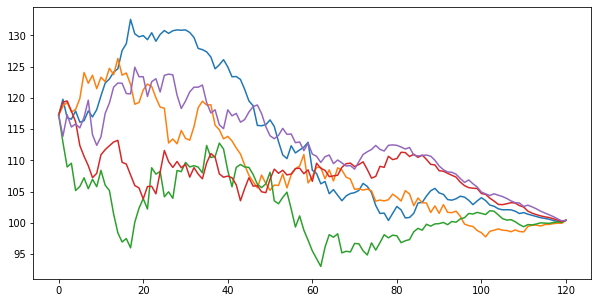

In [35]:
erk.bond_price(10, 100, .05, 12, 
               rates[[1,2,3,4,5]]
              ).plot(legend=False,figsize=(10,5))

In [36]:
prices = erk.bond_price(10, 100, .05, 12, 
               rates[[1,2,3,4,5]]
                       )
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,119.778,118.676,112.905,119.331,113.865
2,116.828,119.293,108.952,119.513,117.308
3,116.59,117.743,109.552,117.902,115.342
4,117.908,118.147,105.186,116.187,115.834
...,...,...,...,...,...
116,100.59,99.7672,99.9365,100.864,101.315
117,100.394,99.8832,100.063,100.674,101.011
118,100.233,99.9622,100.155,100.449,100.655
119,100.125,99.9508,100.094,100.227,100.337


In [38]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [39]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)

1    0.029616
2    0.031038
3    0.033970
4    0.031383
dtype: float64

In [41]:
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,100.59,99.7672,99.9365
117,100.394,99.8832,100.063
118,100.233,99.9622,100.155
119,100.125,99.9508,100.094
120,100.417,100.417,100.417


In [42]:
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,126.565,91.5081,97.5836
117,123.153,94.238,103.321
118,120.156,97.1603,112.807
119,121.769,92.8561,115.839
120,119.899,93.4881,115.951


In [44]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,146.584,143.579,128.661
2,138.904,145.56,119.33
3,138.532,141.624,120.862
4,142.361,143.017,110.963


In [48]:
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
weight = .6
rets_bonds = weight * rets_10 + (1 - weight) * rets_30

In [52]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035618,0.003454,-0.147715,2.783742,-0.001243,-0.000779,1.583233,0.0


In [53]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma =0.15)
price_eq.shape

(121, 500)

In [58]:
rets_eq= price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [59]:
rets_bonds.shape

(120, 500)

In [61]:
eq_weight = .7
rets = eq_weight * rets_eq + (1-eq_weight) * rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.060939,0.004955,0.012541,2.87527,-0.002601,-0.001957,6.07777,0.0
